[과제함](https://cafe.naver.com/esaa2019?iframe_url_utf8=%2FArticleRead.nhn%253Fclubid%3D29858915%2526page%3D1%2526menuid%3D80%2526boardtype%3DL%2526articleid%3D2508%2526referrerAllArticles%3Dfalse)

기한: 11월 24일 (금) 18시 30분

과제: 파이썬 머신러닝 완벽가이드 ch6. 3 pg. 393\~395
필사하여 깃허브에 업로드하고, 깃허브 링크를 댓글로 달아주세요.

# 6. 차원축소
(DimRed1 과제)
1. 차원 축소 개요
2. PCA


---
(이번과제)

3. LDA


---


4. SVD
5. NMF

# 6.3  LDA (Linear Discriminant Analysis)

## 6.3.1 LDA 개요

LDA (선형 판별 분석법)
* PCA 와 매우 유사
  * 입력 데이터 세트를 저차원 공간에 투영하여 차원을 축소
  * 차이: LDA는 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하며 차원 축소
  * PCA: 입력 데이터의 변동성이 가장 큰 축을 사용
  * LDA: 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 사용

* **between**-class scatter 과 **within**-class scatter 의 **비율**을 최대화
  * **between**-class 최대, **within**-class 최소

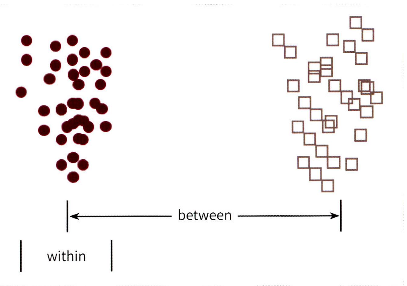

*  LDA를 구하는 스텝, PCA와의 차이점
  * PCA: 공분산 행렬
  * LDA: 클래스 간 분산과 내부 분산 행렬을 생성한 뒤 이 행렬에 기반에 고유벡터를 구하고 입력 데이터를 투영

1. 클래스 내부&간 분산 행렬을 구한다. 이 두 개의 행렬은 입력 데이터의 결정 값 클래스 별로 개별 피처의 평균 벡터를 기반으로 구함
2. Within 클래스 분산 행렬: $S_{W}$\
Between 클래스 분산 행렬: $S_{B}$

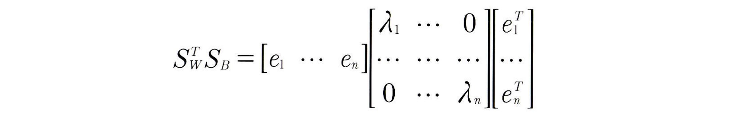

3. 고유값이 가장 큰 순으로 K개 (K = LDA 변환 차수) 추출
4. 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환


## 6.3.2 Iris dataset 에 LDA 적용

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

PCA와 다르게 LDA에서 한 가지 유의해야 할 점: LDA는 PCA와 다르게 비지도 학습이 아닌 지도 학습 이라는 것.\
즉. 클래스의 결정값이 변환시에 필요.\
다음 lda 객체의 fit() 메서드를 호출할 때 결정값이 입력됐음 에 유의하세요.



```
pca.fit(iris_scaled)
```


```
lda.fit(iris_scaled, iris.target)
```



In [2]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


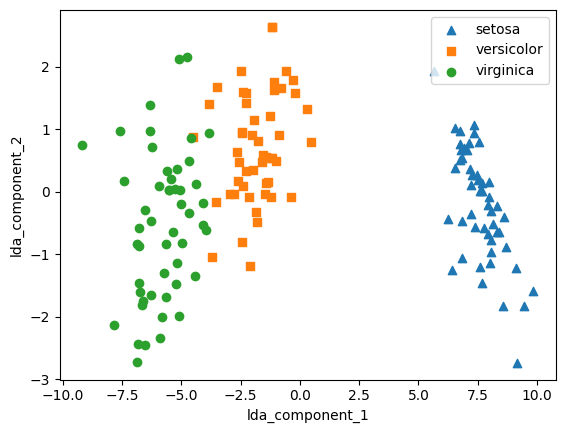

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target']=iris.target

# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^','s','o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
  x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
  y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()